In [406]:
import matplotlib.pyplot as plt
import pandas as pd
import random

In [407]:
cost_of_living = pd.read_csv('data/Family_Budget_Fact_Sheet(County).csv')
cost_of_living['county_fips'] = cost_of_living['county_fips'].astype(str).apply(lambda x: x.zfill(5))
cost_of_living

,case_id,State abv.,county_fips,County,Family,Housing,Food,Transportation,Healthcare,Other Necessities,...,Healthcare.1,Other Necessities .1,Childcare.1,Taxes.1,Total.1,median_family_income,num_counties_in_st,st_cost_rank,st_med_aff_rank,st_income_rank
0,1,AL,01001,Autauga County,1p0c,817,335,1110,510,408,...,"$6,120","$4,896",$0,"$7,488","$45,636","83,790",67,8,58,7.0
1,1,AL,01001,Autauga County,1p1c,1114,494,1365,756,570,...,"$9,072","$6,840","$6,240","$9,132","$66,960","83,790",67,8,58,7.0
2,1,AL,01001,Autauga County,1p2c,1114,723,1570,1003,651,...,"$12,036","$7,812","$12,144","$11,388","$84,252","83,790",67,8,58,7.0
3,1,AL,01001,Autauga County,1p3c,1416,966,1670,1249,843,...,"$14,988","$10,116","$13,956","$14,808","$102,492","83,790",67,8,58,7.0
4,1,AL,01001,Autauga County,1p4c,1416,1182,1742,1495,920,...,"$17,940","$11,040","$13,956","$17,688","$112,704","83,790",67,8,58,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3143,WY,56045,Weston County,2p0c,741,637,1613,1304,488,...,"$15,648","$5,856",$0,"$8,028","$65,412","80,178",23,4,2,18.0
31426,3143,WY,56045,Weston County,2p1c,975,793,1791,1698,626,...,"$20,376","$7,512","$6,708","$9,576","$86,880","80,178",23,4,2,18.0
31427,3143,WY,56045,Weston County,2p2c,975,1003,1911,2091,700,...,"$25,092","$8,400","$13,152","$10,548","$103,872","80,178",23,4,2,18.0
31428,3143,WY,56045,Weston County,2p3c,1187,1225,2074,2485,854,...,"$29,820","$10,248","$15,132","$12,756","$121,812","80,178",23,4,2,18.0


In [408]:
population = pd.read_csv('data/counties.csv')
population

,County,State,FIPS Code,Population,Area,Density
0,Autauga County,Alabama,01001,59095,594,99
1,Baldwin County,Alabama,01003,239294,1589,151
2,Barbour County,Alabama,01005,24964,884,28
3,Bibb County,Alabama,01007,22477,622,36
4,Blount County,Alabama,01009,59041,644,92
...,...,...,...,...,...,...
3089,Sweetwater County,Wyoming,56037,41614,10426,4
3090,Teton County,Wyoming,56039,23575,4008,6
3091,Uinta County,Wyoming,56041,20635,2082,10
3092,Washakie County,Wyoming,56043,7705,2240,3


In [409]:
# fixing new york
population.loc[population['State'] == 'New York', 'Density'] = population.loc[population['State'] == 'New York', 'Population']
population[population['State'] == 'New York']

,County,State,FIPS Code,Population,Area,Density
1818,Albany County,New York,36001,588,533,588
1819,Allegany County,New York,36003,44,1034,44
1820,Bronx County,New York,36005,24811,57,24811
1821,Broome County,New York,36007,275,715,275
1822,Cattaraugus County,New York,36009,58,1310,58
...,...,...,...,...,...,...
1875,Washington County,New York,36115,72,846,72
1876,Wayne County,New York,36117,65,1384,65
1877,Westchester County,New York,36119,1995,500,1995
1878,Wyoming County,New York,36121,67,596,67


In [410]:
df = pd.read_csv('data/asecpub23csv/hhpub23.csv', usecols=['HTOTVAL', 'H_NUMPER', 'GTCO', 'GESTFIPS', 'HSUP_WGT', 'HUNDER18'])

# remove all rows with missing data
df = df[(df['GTCO'] != 0) & (df['GESTFIPS'] != 0) & (df['HTOTVAL'] != 0)]
df['Family Type'] = [f"{min(row['H_NUMPER'] - row['HUNDER18'], 2)}p{min(row['HUNDER18'], 4)}c" for index, row in df.iterrows()]
df = df.drop(columns=['HUNDER18'])

df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO,Family Type
50,23,6,60721,177585,11,2p1c
284,23,2,249073,39576,11,2p0c
285,23,2,119153,126961,11,2p0c
289,23,2,52787,128161,11,2p0c
290,23,1,149570,804,11,1p0c
...,...,...,...,...,...,...
88973,15,4,36445,96000,3,2p1c
88974,15,2,68296,173540,3,2p0c
88975,15,6,44578,211102,3,2p2c
88976,15,5,41320,90415,3,2p2c


In [411]:
N = 1_000_000
sample_df = df.sample(n=N, weights=df['HSUP_WGT'], replace=True)
sample_df

,GESTFIPS,H_NUMPER,HSUP_WGT,HTOTVAL,GTCO,Family Type
14008,42,1,394684,25583,19,1p0c
78523,41,2,138393,57990,39,1p1c
31400,10,3,70067,24001,3,2p1c
47987,12,1,275815,78889,57,1p0c
47729,12,4,232495,29000,85,2p2c
...,...,...,...,...,...,...
84691,6,2,366707,338035,1,2p0c
12075,34,2,487327,112006,21,2p0c
82477,6,5,248503,153635,111,2p2c
47808,12,1,339443,13620,111,1p0c


In [412]:
# import random

# # 'calculate' time
# sample_df['Free Time'] = [ 1 + random.normalvariate(0,0.2) for _ in range(N)]

# calculating FIPS codes

sample_df['GESTFIPS'] = sample_df['GESTFIPS'].astype(str).apply(lambda x: x.zfill(2))
sample_df['GTCO'] = sample_df['GTCO'].astype(str).apply(lambda x: x.zfill(3))
sample_df['Code'] = sample_df['GESTFIPS'] + sample_df['GTCO']

sample_df = sample_df.drop(columns=['GESTFIPS', 'GTCO'])

# renaming cost of income
sample_df = sample_df.rename(columns={'HTOTVAL': 'Income'})

sample_df


,H_NUMPER,HSUP_WGT,Income,Family Type,Code
14008,1,394684,25583,1p0c,42019
78523,2,138393,57990,1p1c,41039
31400,3,70067,24001,2p1c,10003
47987,1,275815,78889,1p0c,12057
47729,4,232495,29000,2p2c,12085
...,...,...,...,...,...
84691,2,366707,338035,2p0c,06001
12075,2,487327,112006,2p0c,34021
82477,5,248503,153635,2p2c,06111
47808,1,339443,13620,1p0c,12111


In [413]:
# adding population density
sample_df = pd.merge(sample_df, population, left_on='Code', right_on='FIPS Code')
sample_df = sample_df.drop(columns=['FIPS Code'])

sample_df

,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density
0,1,394684,25583,1p0c,42019,Butler County,Pennsylvania,194273,795,244
1,5,264938,247830,2p3c,42019,Butler County,Pennsylvania,194273,795,244
2,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,244
3,5,262585,239865,2p1c,42019,Butler County,Pennsylvania,194273,795,244
4,6,254841,239608,2p4c,42019,Butler County,Pennsylvania,194273,795,244
...,...,...,...,...,...,...,...,...,...,...
98623,1,427166,40020,1p0c,51179,Stafford County,Virginia,160877,270,596
98624,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,596
98625,1,427166,40020,1p0c,51179,Stafford County,Virginia,160877,270,596
98626,4,414068,220832,2p0c,51179,Stafford County,Virginia,160877,270,596


In [414]:
# adding cost of living

cost_of_living['Family'] = cost_of_living['Family'].astype(str)
sample_df['Family Type'] = sample_df['Family Type'].astype(str)

sample_df = pd.merge(sample_df, cost_of_living[['county_fips', 'Family', 'Total.1']], 
                     left_on=['Code', 'Family Type'], 
                     right_on=['county_fips', 'Family'])

sample_df = sample_df.drop(columns=['county_fips'])

sample_df['Cost of Living'] = [int(row['Total.1'].strip("$").replace(',', '_')) for index, row in sample_df.iterrows() ]

sample_df


,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living
0,1,394684,25583,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260
1,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260
2,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260
3,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260
4,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98616,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,596,2p3c,"$141,228",141228
98617,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,596,2p3c,"$141,228",141228
98618,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,596,2p3c,"$141,228",141228
98619,5,165259,72001,2p3c,51179,Stafford County,Virginia,160877,270,596,2p3c,"$141,228",141228


In [415]:
land_area = pd.read_csv("data/RDC_Inventory_Core_Metrics_County_History.csv")
# land_area.sort_values('county_fips')
land_area = land_area[(land_area['month_date_yyyymm']) > 2020_00]
land_area['county_fips'] = land_area['county_fips'].astype(str).apply(lambda x: x.zfill(5))
land_area = land_area[['median_square_feet', 'county_fips']]

land_area

,median_square_feet,county_fips
0,1623.0,37199
1,1969.0,42077
2,1782.0,36011
3,2771.0,31093
4,1830.0,48147
...,...,...
155238,1722.0,47131
155239,1768.0,20165
155240,1849.0,30099
155241,1819.0,18131


In [416]:
county_land_area = {}
state_land_area = {}

for index, row in land_area.iterrows():
    code = row['county_fips']
    state = code[:3]

    if code not in county_land_area:
        county_land_area[code] = [index]
    else:
        county_land_area[code].append(index)

    if state not in state_land_area:
        state_land_area[state] = [index]
    else:
        state_land_area[state].append(index)

In [417]:

def select_random_row(county_code):
    if county_code in county_land_area:
        index = random.choice(county_land_area[county_code])
        return land_area.iloc[index]

    state = county_code[:3]
    index = random.choice(state_land_area[state])
    return land_area.iloc[index]

houses = sample_df['Code'].apply(select_random_row)

In [418]:
sample_df = pd.concat([sample_df.reset_index(), houses[['median_square_feet']]], axis=1)
sample_df

,index,H_NUMPER,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,median_square_feet
0,0,1,394684,25583,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260,1979.0
1,1,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260,1913.0
2,2,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260,1814.0
3,3,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260,2791.0
4,4,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,244,1p0c,"$43,260",43260,1827.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98616,98616,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,596,2p3c,"$141,228",141228,2667.0
98617,98617,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,596,2p3c,"$141,228",141228,2798.0
98618,98618,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,596,2p3c,"$141,228",141228,2396.0
98619,98619,5,165259,72001,2p3c,51179,Stafford County,Virginia,160877,270,596,2p3c,"$141,228",141228,2807.0


In [419]:
# clean up
sample_df = sample_df.rename(columns={"H_NUMPER": "Number of People", "median_square_feet": "Floor Area"})
sample_df['Floor Area'] = sample_df['Floor Area'] * 0.09290304
sample_df['Density'] = sample_df['Density'] * 0.3861274922774502
sample_df

,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area
0,0,1,394684,25583,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,183.855116
1,1,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,177.723516
2,2,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,168.526115
3,3,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,259.292385
4,4,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,169.733854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98616,98616,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,247.772408
98617,98617,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,259.942706
98618,98618,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,222.595684
98619,98619,5,165259,72001,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,260.778833


In [420]:
import random

# 'calculate' time
sample_df['Free Time'] = [ -0.0005*row['Density'] + 9 + random.normalvariate(0,0.2) for index, row in sample_df.iterrows()]

In [421]:
from modelcat import get_HPFI, get_income_index, get_space_index, get_time_index

(array([  985.,  2273.,  2422.,  2221.,  2557.,  3400.,  4164.,  4753.,
         5190.,  5666.,  5773.,  5302.,  5126.,  5490.,  5626.,  5850.,
         6561.,  8123., 10280.,  6859.]),
 array([0.00208352, 0.05192832, 0.10177313, 0.15161794, 0.20146274,
        0.25130755, 0.30115236, 0.35099717, 0.40084197, 0.45068678,
        0.50053159, 0.5503764 , 0.6002212 , 0.65006601, 0.69991082,
        0.74975562, 0.79960043, 0.84944524, 0.89929005, 0.94913485,
        0.99897966]),
 <BarContainer object of 20 artists>)

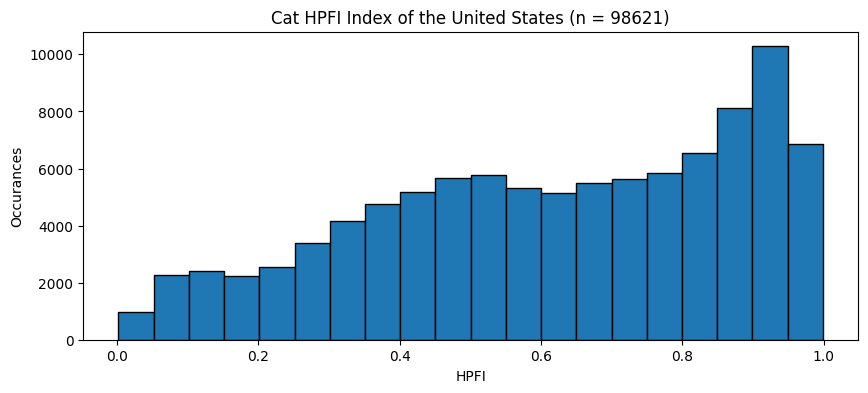

In [422]:
sample_HPFI = []
sample_II   = []
sample_SI   = []
sample_TI   = []

for index, row in sample_df.iterrows():
    number_of_people    = row['Number of People']
    income              = row['Income']
    free_time           = row['Free Time']
    density             = row['Density']
    cost_of_living      = row['Cost of Living']
    floor_area          = row['Floor Area']

    HPFI    = get_HPFI(density, cost_of_living, income, number_of_people, free_time, floor_area, 100000/(density+1))
    II      = get_income_index(income, cost_of_living)
    SI      = get_space_index(density, number_of_people, floor_area, 0)
    TI      = get_time_index(free_time)

    sample_HPFI.append(HPFI)
    sample_II.append(II)
    sample_SI.append(SI)
    sample_TI.append(TI)

# sample_HPFI
plt.figure(figsize=(10, 4))
plt.title(f'Cat HPFI Index of the United States (n = {len(sample_HPFI)})')
plt.xlabel('HPFI')
plt.ylabel('Occurances')
plt.hist(sample_HPFI, bins=20, edgecolor="black")


In [423]:
sample_df['HPFI'] = sample_HPFI
sample_df['Income Index'] = sample_II
sample_df['Space Index'] = sample_SI
sample_df['Time Index'] = sample_TI

sample_df


,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
0,0,1,394684,25583,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,183.855116,9.112854,0.563059,0.193965,0.793967,0.999812
1,1,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,177.723516,8.797838,0.893992,0.785321,0.771195,0.999662
2,2,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,168.526115,8.923845,0.888131,0.785321,0.733835,0.999732
3,3,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,259.292385,8.841915,0.704628,0.355775,0.952430,0.999688
4,4,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,169.733854,8.807861,0.682732,0.355775,0.738956,0.999668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98616,98616,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,247.772408,9.123673,0.385496,0.080789,0.470608,0.999816
98617,98617,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,259.942706,8.905613,0.395049,0.080789,0.540358,0.999723
98618,98618,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,222.595684,8.879836,0.360012,0.080789,0.332726,0.999709
98619,98619,5,165259,72001,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,260.778833,8.948574,0.173528,0.006816,0.545123,0.999744


In [424]:
len(sample_df[sample_df['HPFI'] > 0.5]) / len(sample_df)

0.6595552671337748

In [425]:
sample_df.describe()
sample_df

,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
0,0,1,394684,25583,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,183.855116,9.112854,0.563059,0.193965,0.793967,0.999812
1,1,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,177.723516,8.797838,0.893992,0.785321,0.771195,0.999662
2,2,1,429441,80011,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,168.526115,8.923845,0.888131,0.785321,0.733835,0.999732
3,3,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,259.292385,8.841915,0.704628,0.355775,0.952430,0.999688
4,4,1,390583,42197,1p0c,42019,Butler County,Pennsylvania,194273,795,94.215108,1p0c,"$43,260",43260,169.733854,8.807861,0.682732,0.355775,0.738956,0.999668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98616,98616,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,247.772408,9.123673,0.385496,0.080789,0.470608,0.999816
98617,98617,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,259.942706,8.905613,0.395049,0.080789,0.540358,0.999723
98618,98618,5,242599,123000,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,222.595684,8.879836,0.360012,0.080789,0.332726,0.999709
98619,98619,5,165259,72001,2p3c,51179,Stafford County,Virginia,160877,270,230.131985,2p3c,"$141,228",141228,260.778833,8.948574,0.173528,0.006816,0.545123,0.999744


In [426]:
sample_rural = sample_df[sample_df['Density'] <= 100]
sample_suburban = sample_df[(sample_df['Density'] <= 3_200) & (sample_df['Density'] > 100)]
sample_urban = sample_df[sample_df['Density'] >= 3_200]

In [427]:
sample_rural.describe()

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,14513.000000,14513.000000,14513.000000,1.451300e+04,1.451300e+04,14513.000000,14513.000000,14513.000000,14513.000000,14513.000000,14513.000000,14513.000000,14513.000000,14513.000000
mean,65677.886929,2.462413,305491.890374,9.512398e+04,2.969353e+05,2507.813271,60.233148,67564.067250,176.812281,8.966720,0.630441,0.470803,0.535409,0.999736
std,29529.694420,1.460046,135439.663810,1.001206e+05,2.540023e+05,2386.173890,25.454384,24617.693788,23.280837,0.200904,0.239199,0.364102,0.224083,0.000102
min,0.000000,1.000000,26221.000000,-9.998000e+03,1.690000e+02,418.000000,8.494805,37656.000000,118.915891,8.077660,0.021488,0.000036,0.003200,0.998813
25%,49477.000000,1.000000,209083.000000,3.600000e+04,1.527650e+05,804.000000,37.454367,51024.000000,161.186774,8.832282,0.458795,0.124301,0.384145,0.999682
50%,76428.000000,2.000000,288878.000000,6.951600e+04,2.026780e+05,1244.000000,62.938781,60636.000000,173.821588,8.966478,0.656359,0.384041,0.581767,0.999752
75%,88443.000000,3.000000,408436.000000,1.222110e+05,3.400360e+05,3357.000000,82.631283,79140.000000,188.314462,9.100865,0.848287,0.865611,0.712304,0.999808
max,98374.000000,12.000000,779051.000000,2.263498e+06,1.052030e+06,9189.000000,99.234766,202368.000000,281.589114,9.725111,0.993394,1.000000,0.958858,0.999944


In [428]:
sample_suburban.describe()

,index,Number of People,HSUP_WGT,Income,Population,Area,Density,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
count,74812.000000,74812.000000,7.481200e+04,7.481200e+04,7.481200e+04,74812.000000,74812.000000,74812.000000,74812.000000,74812.000000,74812.000000,74812.000000,74812.000000,74812.000000
mean,46744.465808,2.464952,3.221691e+05,1.178567e+05,1.746631e+06,1570.154547,561.328832,75420.611774,173.975077,8.719540,0.628511,0.495201,0.567640,0.999546
std,27731.558197,1.428223,1.275117e+05,1.359794e+05,2.535835e+06,2101.692251,446.436562,28637.735289,30.401564,0.299824,0.253069,0.379942,0.255295,0.000333
min,336.000000,1.000000,2.919700e+04,-9.593000e+03,2.810000e+02,57.000000,101.165403,36864.000000,82.869512,7.079680,0.007357,0.000013,0.000001,0.994455
25%,23144.750000,1.000000,2.258158e+05,4.200000e+04,4.042080e+05,471.000000,213.142376,55764.000000,155.705495,8.550172,0.433829,0.114199,0.377001,0.999472
50%,45776.500000,2.000000,3.050460e+05,8.150200e+04,7.894100e+05,738.000000,487.292895,67968.000000,170.569981,8.747012,0.660355,0.431943,0.617727,0.999629
75%,68676.250000,3.000000,4.138190e+05,1.493030e+05,1.648556e+06,1407.000000,779.977534,87684.000000,188.593171,8.921654,0.857705,0.929355,0.778100,0.999731
max,98620.000000,16.000000,1.072820e+06,2.550898e+06,9.829544e+06,9224.000000,2619.875035,243300.000000,297.754243,9.698268,0.998980,1.000000,0.997420,0.999941


In [429]:
sample_urban.describe()
sample_urban

,index,Number of People,HSUP_WGT,Income,Family Type,Code,County,State,Population,Area,Density,Family,Total.1,Cost of Living,Floor Area,Free Time,HPFI,Income Index,Space Index,Time Index
9135,9135,1,276010,87078,1p0c,36061,New York County,New York,46694,33,18029.837124,1p0c,"$78,456",78456,121.424273,0.221607,0.416559,0.386640,1.0,0.186949
9136,9136,1,682635,93640,1p0c,36061,New York County,New York,46694,33,18029.837124,1p0c,"$78,456",78456,125.419104,0.159593,0.436935,0.466709,1.0,0.178733
9137,9137,1,378958,23328,1p0c,36061,New York County,New York,46694,33,18029.837124,1p0c,"$78,456",78456,125.326201,-0.441604,0.141228,0.025358,1.0,0.111080
9138,9138,1,291396,21660,1p0c,36061,New York County,New York,46694,33,18029.837124,1p0c,"$78,456",78456,120.959758,0.168658,0.161419,0.023377,1.0,0.179920
9139,9139,1,302135,12601,1p0c,36061,New York County,New York,46694,33,18029.837124,1p0c,"$78,456",78456,130.064256,0.212974,0.140692,0.014989,1.0,0.185791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81134,81134,5,409398,45000,2p3c,53033,King County,Washington,2269675,33,26557.076664,2p3c,"$165,276",165276,167.225472,-4.284132,0.007063,0.000420,1.0,0.000839
81135,81135,5,412330,86587,2p3c,53033,King County,Washington,2269675,33,26557.076664,2p3c,"$165,276",165276,144.464227,-4.152482,0.015200,0.003351,1.0,0.001048
81136,81136,5,409398,45000,2p3c,53033,King County,Washington,2269675,33,26557.076664,2p3c,"$165,276",165276,185.341565,-4.365070,0.006744,0.000420,1.0,0.000730
81137,81137,5,194166,48941,2p3c,53033,King County,Washington,2269675,33,26557.076664,2p3c,"$165,276",165276,188.035753,-4.082263,0.008448,0.000512,1.0,0.001178
